### import the packages and data

In [1]:
import numpy as np
import pandas as pd

In [2]:
stores=pd.read_csv('D:/time series/stores.csv')

In [3]:
features=pd.read_csv('D:/time series/features.csv')

In [4]:
train=pd.read_csv('D:/time series/train.csv')

In [5]:
test_1=pd.read_csv('D:/time series/test.csv')

In [6]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [7]:
test_1

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [8]:
train.Date=train.Date.astype('datetime64')
features.Date=features.Date.astype('datetime64')
test_1.Date=test_1.Date.astype('datetime64')

In [9]:
feat_s=features.merge(stores,on='Store')

In [10]:
feat_s['Week']=feat_s.Date.dt.week

In [11]:
feat_s['Year']=feat_s.Date.dt.year

### final data

In [12]:
train_final=train.merge(feat_s,on=['Store','Date','IsHoliday'])

In [13]:
test_final=test_1.merge(feat_s,on=['Store','Date','IsHoliday'])

In [14]:
train_final=train_final.set_index('Date')

In [15]:
#seperating continous and categorical variables

In [16]:
train_conti=train_final.loc[:,(train_final.dtypes=='int64') | (train_final.dtypes=='float64')]
train_cate=train_final.loc[:,(train_final.dtypes=='object')]

In [17]:
# creating UDF's
def continuous_var_summary(x):
    return pd.Series([x.dtype, x.nunique(), x.count(), x.isnull().sum(), x.sum(), x.mean(),
                      x.median(), x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
            index = ['DataType', 'C', 'N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 
                           'P1', 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [18]:
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [19]:
train_conti.apply(continuous_var_summary)

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Year
DataType,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
C,45,81,359464,3528,892,2277,1499,1662,1944,2293,2145,349,40,52,3
N,421570,421570,421570,421570,421570,150681,111248,137091,134967,151432,421570,421570,421570,421570,421570
NMISS,0,0,0,0,0,270889,310322,284479,286603,270138,0,0,0,0,0
SUM,9359084,18658822,6.73722e+09,2.53322e+07,1.41691e+06,1.0919e+09,3.70971e+08,1.97332e+08,4.56616e+08,7.00975e+08,7.21736e+07,3.35582e+06,57640387438,10887788,847764029
MEAN,22.2005,44.2603,15981.3,60.0901,3.36103,7246.42,3334.63,1439.42,3383.17,4628.98,171.202,7.96029,136728,25.8268,2010.97
MEDIAN,22,37,7612.03,62.09,3.452,5347.45,192,24.6,1481.31,3359.45,182.319,7.866,140167,26,2011
STD,12.7853,30.4921,22711.2,18.4479,0.458515,8291.22,9475.36,9623.08,6292.38,5962.89,39.1593,1.8633,60980.6,14.1519,0.796876
VAR,163.464,929.765,5.15798e+08,340.326,0.210236,6.87444e+07,8.97824e+07,9.26036e+07,3.95941e+07,3.5556e+07,1533.45,3.47187,3.71863e+09,200.276,0.635011
MIN,1,1,-4988.94,-2.06,2.472,0.27,-265.76,-29.1,0.22,135.16,126.064,3.879,34875,1,2010


### creating dummies and outlier treatment

In [20]:
train_final.IsHoliday=train_final.IsHoliday.astype('int')

In [21]:
dummi=pd.get_dummies(train_final.Type,drop_first=True)

In [22]:
train_conti=train_conti.apply(lambda x : x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

### final data

'MarkDown' 1 to 5 are not strong correlated to 'Weekly_Sales' and they have a lot of null values, then we can drop them.

In [23]:
train_conti.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

In [24]:
train_conti=pd.concat([train_conti,dummi],axis=1)

In [25]:
train_conti

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Week,Year,B,C
Date,,,,,,,,,,,,
2010-02-05,1,1,24924.50,42.31,2.572,211.096358,8.106,151315,5,2010,0,0
2010-02-05,1,2,50605.27,42.31,2.572,211.096358,8.106,151315,5,2010,0,0
2010-02-05,1,3,13740.12,42.31,2.572,211.096358,8.106,151315,5,2010,0,0
2010-02-05,1,4,39954.04,42.31,2.572,211.096358,8.106,151315,5,2010,0,0
2010-02-05,1,5,32229.38,42.31,2.572,211.096358,8.106,151315,5,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,45,93,2487.80,58.85,3.882,192.308899,8.667,118221,43,2012,1,0
2012-10-26,45,94,5203.31,58.85,3.882,192.308899,8.667,118221,43,2012,1,0
2012-10-26,45,95,56017.47,58.85,3.882,192.308899,8.667,118221,43,2012,1,0


### co-relation matrix

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
corr=train_conti.corr()

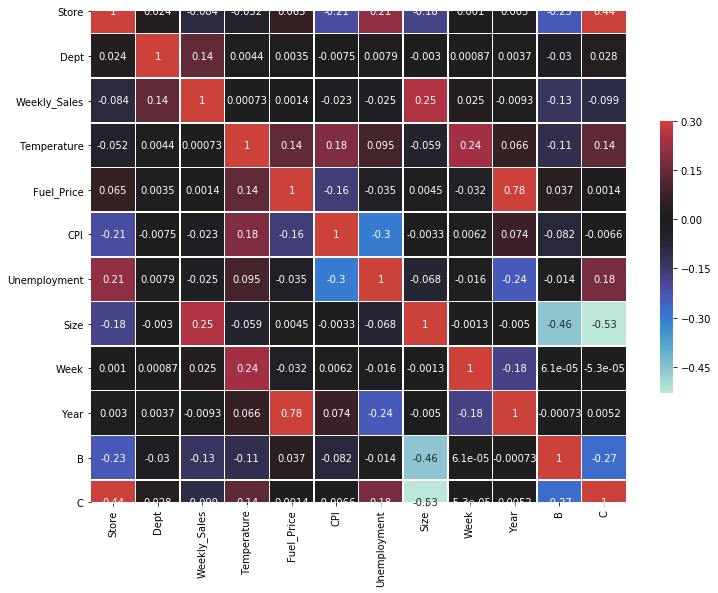

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

### Assumption check

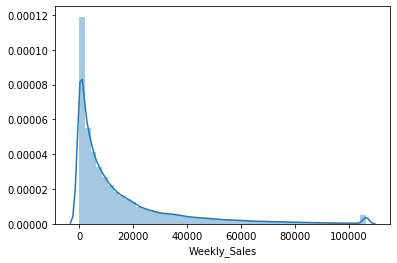

In [29]:
sns.distplot(train_conti.Weekly_Sales)

The data is skewed as we have to transform it using Log transformation

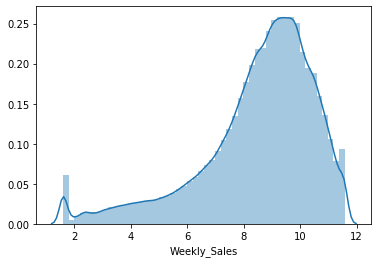

In [30]:
sns.distplot(np.log(train_conti.Weekly_Sales))

In [31]:
train_conti['ln_Weekly_Sales']=np.log(train_conti.Weekly_Sales)

In [32]:
train_conti.drop('Weekly_Sales',axis=1,inplace=True)

In [33]:
corrm = train_conti.corr()
corrm.to_excel('forecast.xlsx')

In [34]:
%pwd

'C:\\Users\\prash'

### feature selection using F - regression

In [35]:
Feature = train_conti[train_conti.columns.difference(['ln_Weekly_Sales'])]
Target = train_conti['ln_Weekly_Sales']

In [36]:
from sklearn.feature_selection import f_regression

In [37]:
F_Value, p_Value = f_regression(Feature, Target)

In [38]:
F_Regression_results = pd.concat([pd.Series(Feature.columns), 
                            pd.Series(F_Value), pd.Series(p_Value).round(5)], axis = 1)

# add the column names
F_Regression_results.columns = ['Feature', 'F_value', 'p_value']

In [39]:
F_Regression_results.sort_values(by  = 'p_value')

,Feature,F_value,p_value
0,B,1072.068539,0.00000
1,C,24830.396480,0.00000
2,CPI,106.173047,0.00000
3,Dept,156.967606,0.00000
5,Size,46446.617227,0.00000
6,Store,7755.569106,0.00000
7,Temperature,649.785890,0.00000
8,Unemployment,785.778559,0.00000
9,Week,181.271999,0.00000
10,Year,123.553713,0.00000


In [40]:
F_Regression_results.sort_values(by  = 'p_value')

,Feature,F_value,p_value
0,B,1072.068539,0.00000
1,C,24830.396480,0.00000
2,CPI,106.173047,0.00000
3,Dept,156.967606,0.00000
5,Size,46446.617227,0.00000
6,Store,7755.569106,0.00000
7,Temperature,649.785890,0.00000
8,Unemployment,785.778559,0.00000
9,Week,181.271999,0.00000
10,Year,123.553713,0.00000


In [41]:
Feature = list(F_Regression_results.loc[ F_Regression_results.p_value <= 0.002,'Feature' ])

In [42]:
Feature

['B',
 'C',
 'CPI',
 'Dept',
 'Fuel_Price',
 'Size',
 'Store',
 'Temperature',
 'Unemployment',
 'Week',
 'Year']

### Remove the multi colinear variables - VIF

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [44]:
model_param = 'ln_Weekly_Sales ~ ' + ' + '.join(Feature)

In [45]:
y, x = dmatrices(model_param, train_conti, return_type = 'dataframe')

In [46]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF Factor'] = [variance_inflation_factor(x.values, i).round(2) for i in range(x.shape[1])]
vif

,Features,VIF Factor
0,Intercept,21282876.01
1,B,2.46
2,C,2.75
3,CPI,1.35
4,Dept,1.00
5,Fuel_Price,3.25
6,Size,3.05
7,Store,1.39
8,Temperature,1.23
9,Unemployment,1.29


In [47]:
Features = list(vif.loc[ vif.Features != 'Intercept', 'Features'])

### Splitting the Data for model building

In [48]:
from sklearn.model_selection import train_test_split


In [49]:
train, test = train_test_split(train_conti, test_size = 0.3, random_state = 1)

In [50]:
print('No of obs in training: ', len(train), ' | ', 'No of obs in testing: ', len(test))

No of obs in training:  295099  |  No of obs in testing:  126471


### Building Model using OLS (Ordinary  Least Squares)

In [51]:
formula_m0 = 'ln_Weekly_Sales~ ' + ' + '.join( Features )

In [52]:
import statsmodels.formula.api as smf

In [53]:
lm0 = smf.ols( formula_m0, train ).fit()

In [54]:
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:        ln_Weekly_Sales   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     3434.
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:00:34   Log-Likelihood:            -6.1238e+05
No. Observations:              295099   AIC:                         1.225e+06
Df Residuals:                  295087   BIC:                         1.225e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       86.7768     16.374      5.300   

### Predicting Models

In [55]:
train.loc[:, 'pred_Weekly_Sales'] = np.exp( lm0.predict(train) )

C:\Users\prash\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\prash\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [56]:
test.loc[:, 'pred_Weekly_Sales'] = np.exp( lm0.predict(test) )

In [57]:
train['Weekly_Sales']=np.exp(train.ln_Weekly_Sales)
test['Weekly_Sales']=np.exp(test.ln_Weekly_Sales)

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
from sklearn import metrics

In [59]:
MAE_train =metrics.mean_absolute_error(train.Weekly_Sales, train.pred_Weekly_Sales)
MAE_test = metrics.mean_absolute_error(test.Weekly_Sales, test.pred_Weekly_Sales)

### model validation - for accuracies after predictions

In [60]:
print('MAE of training data: ', MAE_train,  ' | ', 'MAE of testing data: ', MAE_test)

MAE of training data:  12759.428593816747  |  MAE of testing data:  12726.216352043475


In [61]:
MAPE_train = np.mean(np.abs(train['Weekly_Sales'] - train['pred_Weekly_Sales'])/train['Weekly_Sales'])
MAPE_test = np.mean(np.abs(test['Weekly_Sales'] - test['pred_Weekly_Sales'])/test['Weekly_Sales'])


In [62]:
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  21.670262548381157  |  MAPE of testing data:  21.097126288105695


### Using Random Forest Regressor for predicting Weekly Sales

In [63]:
from sklearn.model_selection import GridSearchCV,train_test_split

In [64]:
x_train = train_final[['Store','Dept','IsHoliday','Week','Size','Year']]
y_train = train_final['Weekly_Sales']

In [65]:
train_x,test_x,train_y,test_y=train_test_split(x_train,y_train,test_size=0.3,random_state=1234)

In [66]:
from sklearn.ensemble import RandomForestRegressor

### Using GridSearch to get best paramters

In [67]:
params={'max_features':range(2,5),'max_depth':range(2,10)}

In [68]:
grid=GridSearchCV(RandomForestRegressor(),param_grid=params,verbose=1,cv=10,n_jobs=-1)

In [69]:
grid.fit(train_x,train_y)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.1min finished
C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
     

In [70]:
grid.best_params_

{'max_depth': 9, 'max_features': 4}

In [71]:
grid.best_score_

0.8217559257373926

### Creating Model

In [72]:
rv=RandomForestRegressor(max_depth=9,n_estimators=150,max_features=4)

In [73]:
rv.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Predicting Weekly Sales and creating data frame

In [74]:
rv_df=pd.DataFrame({'pred':rv.predict(test_x),'act':test_y})

In [75]:
from sklearn import metrics

In [76]:
from sklearn.metrics import mean_squared_error

### Calculating R- sq

In [77]:
test_ssr=(rv.predict(test_x)-test_y.mean())**2
test_sse=(test_y-rv.predict(test_x))**2
test_sst=test_ssr+test_sse
test_r2=test_ssr.sum()/test_sst.sum()
test_r2

0.8093858551704757

### model validation - for accuracies after predictions

In [78]:
mae_test=metrics.mean_absolute_error(rv.predict(test_x),test_y)

In [79]:
mae_train=metrics.mean_absolute_error(rv.predict(train_x),train_y)

In [80]:
print('MAE of training data: ', mae_train,  ' | ', 'MAE of testing data: ', mae_test)

MAE of training data:  5563.529337729174  |  MAE of testing data:  5571.204852007424


In [81]:
mse_test=metrics.mean_squared_error(rv.predict(test_x),test_y)

In [82]:
mse_train=metrics.mean_squared_error(rv.predict(train_x),train_y)

In [83]:
print('MSE of training data: ', mse_train,  ' | ', 'MSE of testing data: ', mse_test)

MSE of training data:  84120137.49309091  |  MSE of testing data:  83655397.53890137


In [84]:
train_x.columns

Index(['Store', 'Dept', 'IsHoliday', 'Week', 'Size', 'Year'], dtype='object')

### Predicting Weekly sales on Test data

In [85]:
test_final.IsHoliday=test_final.IsHoliday.astype('int')

In [86]:
dum=pd.get_dummies(test_final.Type,drop_first=True)

In [87]:
test_final=pd.concat([test_final,dum],axis=1)

In [88]:
test_final=test_final.set_index('Date')

In [89]:
test_final.drop('Type',axis=1,inplace=True)

In [90]:
test_final.dropna(inplace=True)

In [91]:
test_final.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size', 'Week', 'Year', 'B', 'C'],
      dtype='object')

In [92]:
x=test_final.drop(['MarkDown2','MarkDown1','MarkDown3','MarkDown4','MarkDown5','Fuel_Price','Temperature','CPI','Unemployment','C','B'],axis=1)

In [93]:
weekly_sale=rv.predict(x)

In [94]:
weekly_sale

array([10289.57528727, 14993.82390507,  9109.31255904, ...,
       36251.32108163,  6406.20062121,  3114.39687478])

In [95]:
weekly_sale_test=pd.DataFrame(weekly_sale,x.index)

In [96]:
weekly_sale_test

,0
Date,
2012-11-02,10289.575287
2012-11-02,14993.823905
2012-11-02,9109.312559
2012-11-02,10128.554246
2012-11-02,10371.958730
...,...
2013-04-19,15992.927691
2013-04-19,18171.908779
2013-04-19,36251.321082


### Conclusion:

-- The R-sq of OLS method was much Low than that of Random Forest Regressor. 


--The stability of Random Forest Regressor is more than that of OLS



-- We will choose  Random Forest Regressor over OLS.



-- The accuracy of Random Forest was good  as compared to OLS.


-- And we have chosen Random Forest Regressor Model for the output